# Machine Learning 2 Project
Worked with Paul

We will work on the fraud detection problem, we have implemented Linear regression, Decision tree (xgboost) and finally a neural network. The main difficulty that we have encountered for the fraud detection is that: there are not sufficient fraud record as training sample. The fraud rate is about 8%, so the data set is highly baised. 

We find that the classical neutral network framework can catch up the features for 10% with rather simple feature engineering while the tree model and linear regression will predict all negative(no fraud). 

The neural network algorithms can be improved by a more complex design/structure and a longer training time while the XGBoost method can be improved by a onehot encoder and a oversampling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime

### Import and look at the data

In [ ]:
df = pd.read_csv("CreditTraining.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Customer          5380 non-null   int64  
 1   Y                    5380 non-null   int64  
 2   Customer_Type        5380 non-null   object 
 3   BirthDate            5380 non-null   object 
 4   Customer_Open_Date   5380 non-null   object 
 5   P_Client             5380 non-null   object 
 6   Educational_Level    5380 non-null   object 
 7   Marital_Status       5380 non-null   object 
 8   Number_Of_Dependant  5378 non-null   float64
 9   Years_At_Residence   5380 non-null   int64  
 10  Net_Annual_Income    5378 non-null   object 
 11  Years_At_Business    5378 non-null   float64
 12  Prod_Sub_Category    5380 non-null   object 
 13  Prod_Decision_Date   5380 non-null   object 
 14  Source               5380 non-null   object 
 15  Type_Of_Residence    5380 non-null   o

In [ ]:
df.head()

Id_Customer  Y  ... Prod_Closed_Date Prod_Category
0         7440  0  ...              NaN             B
1          573  0  ...              NaN             G
2         9194  0  ...              NaN             B
3         3016  1  ...       31/12/2012             L
4         6524  0  ...              NaN             D

[5 rows x 19 columns]

Eliminate Id and Y from features:

In [ ]:
features = df.columns.values.tolist()[2:]
print(features)

['Customer_Type', 'BirthDate', 'Customer_Open_Date', 'P_Client', 'Educational_Level', 'Marital_Status', 'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business', 'Prod_Sub_Category', 'Prod_Decision_Date', 'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Closed_Date', 'Prod_Category']


We remark that aside from the column "Prod_Closed_Date", we don't miss much values in other feature columns.

In [ ]:
features = df.columns.values.tolist()[2:]
for f in features:
    print(f+" value counts:\n", df[f].value_counts(), '\n')

Customer_Type value counts:
 Non Existing Client    3369
Existing Client        2011
Name: Customer_Type, dtype: int64 

BirthDate value counts:
 01/01/1973    7
01/01/1982    7
01/01/1985    6
01/10/1984    6
01/01/1970    6
             ..
09/06/1983    1
28/02/1982    1
01/06/1965    1
16/03/1955    1
15/11/1978    1
Name: BirthDate, Length: 4382, dtype: int64 

Customer_Open_Date value counts:
 05/12/2011    39
12/12/2011    38
17/07/2011    37
18/09/2011    36
14/07/2011    36
              ..
17/02/2001     1
05/01/2006     1
10/01/2005     1
27/02/2001     1
20/01/2008     1
Name: Customer_Open_Date, Length: 1244, dtype: int64 

P_Client value counts:
 NP_Client    4968
P_Client      412
Name: P_Client, dtype: int64 

Educational_Level value counts:
 University           4785
Master/PhD            522
Diploma                58
Secondary or Less      15
Name: Educational_Level, dtype: int64 

Marital_Status value counts:
 Married      4206
Single       1046
Widowed        64
Divo

We select out the categorical features for further processing.


In [ ]:
features_cat = ['Customer_Type','P_Client','Educational_Level','Marital_Status','Prod_Sub_Category',
                    'Source','Type_Of_Residence', 'Prod_Category']
features_num = list(set(features) - set(features_cat)) # get the numerical and categorical features stored in seperate list.

#### Change date features

In [ ]:
dates = ['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date','Prod_Closed_Date']
for d in dates:
    df[d] = pd.to_datetime(df[d], format = "%d/%m/%Y", errors='ignore')
df.head()

Id_Customer  Y  ... Prod_Closed_Date Prod_Category
0         7440  0  ...              NaT             B
1          573  0  ...              NaT             G
2         9194  0  ...              NaT             B
3         3016  1  ...       2012-12-31             L
4         6524  0  ...              NaT             D

[5 rows x 19 columns]

#### Change string to float

In [ ]:
to_float = ['Net_Annual_Income']
for f in to_float:
    df[f] = df[f].str.replace(',','.').astype(float)

We now could have a look at the numerical features distribution over the dataset and on the dataset of positive labels. 
By observation, we find that the net annual income may be a important feature.

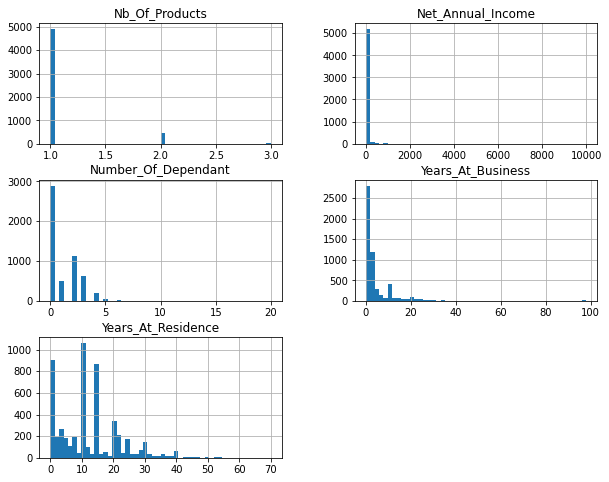

In [ ]:
df[features].hist(bins = 50, figsize = (10,8))
plt.show()

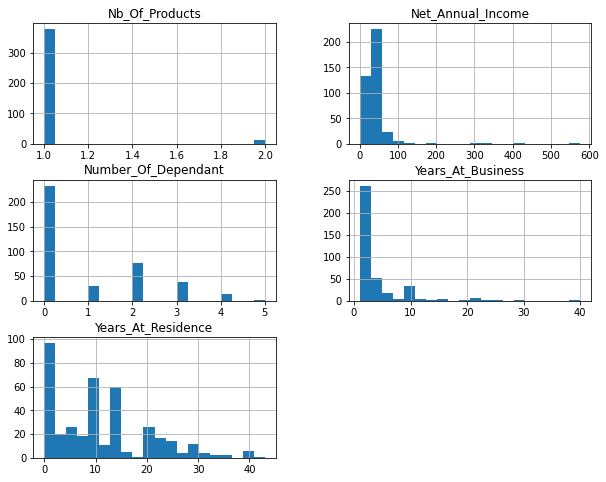

In [ ]:
fraud_set = df[df['Y'] == 1]
fraud_set[features].hist(bins = 20, figsize = (10,8))
plt.show()

### Data cleaning

#### Catagorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# use a new data_frame df_c 
df_c = df.copy()
encoder_dict = {}
for f in features_cat:
    encoder = LabelEncoder()
    df_c[f] = encoder.fit_transform(df_c[f])
    encoder_dict[f] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_))) # encoder_dict store the initial categorical value and the corresponding numerical value.

### Visualize data after changed categorical features to numerical ones

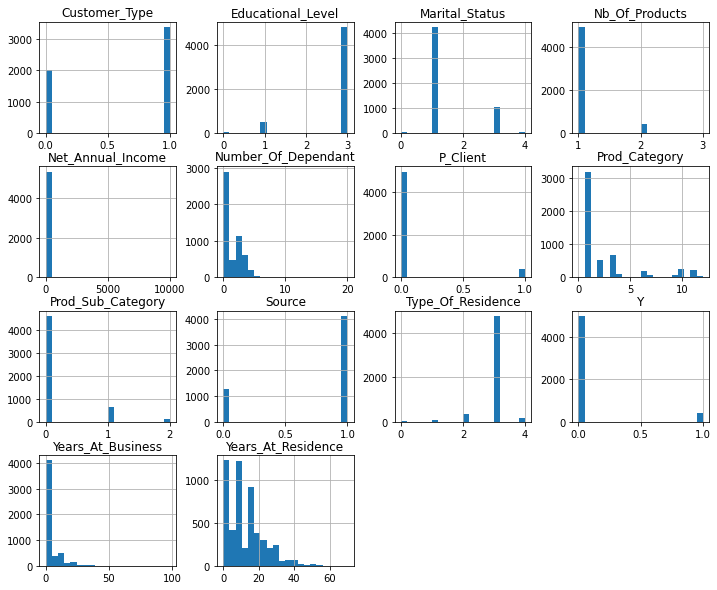

In [ ]:
df_c.drop("Id_Customer", axis = 1).hist(bins = 20, figsize = (12,10))
plt.show()

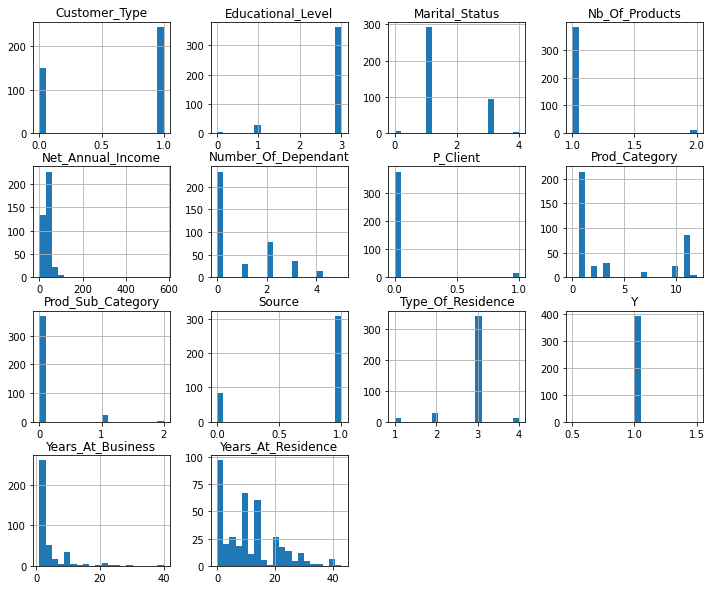

In [ ]:
df_c[df_c["Y"]==1].drop("Id_Customer", axis = 1).hist(bins = 20, figsize = (12,10))
plt.show()

In [ ]:
encoder_dict

{'Customer_Type': {'Existing Client': 0, 'Non Existing Client': 1},
 'Educational_Level': {'Diploma': 0,
  'Master/PhD': 1,
  'Secondary or Less': 2,
  'University': 3},
 'Marital_Status': {'Divorced': 0,
  'Married': 1,
  'Separated': 2,
  'Single': 3,
  'Widowed': 4},
 'P_Client': {'NP_Client': 0, 'P_Client': 1},
 'Prod_Category': {'A': 0,
  'B': 1,
  'C': 2,
  'D': 3,
  'E': 4,
  'F': 5,
  'G': 6,
  'H': 7,
  'I': 8,
  'J': 9,
  'K': 10,
  'L': 11,
  'M': 12},
 'Prod_Sub_Category': {'C': 0, 'G': 1, 'P': 2},
 'Source': {'Branch': 0, 'Sales': 1},
 'Type_Of_Residence': {'Company': 0,
  'New rent': 1,
  'Old rent': 2,
  'Owned': 3,
  'Parents': 4}}

We remark that the product category K has a higer fraud ratio.

### OneHot encoder maybe be a better choice

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_1hot = df.copy()
for f in features_cat:
    encoder_1hot = OneHotEncoder()
    tmp = encoder_1hot.fit_transform(df[f].to_numpy().reshape(-1,1))
    n_class = len(df[f].value_counts())
    dic = {}
    for i in range(n_class):
        dic[i]= f"{f}"+str(i) # rename categorical features by the form: "cat_name"+"numerical class"
    tmp = pd.DataFrame(tmp.toarray()).rename(columns=dic)
    df_1hot = df_1hot.drop(f, axis=1)
    df_1hot = pd.concat([df_1hot, tmp], axis=1)
df_1hot = df_1hot.drop("Id_Customer", axis = 1) # Id_Customer is a useless feature

## Split train, test set, and drop label in test set

After the preprocessing, we could now split the train-test set. We choose the test-set portion to be 0.3.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [ ]:
train_set, test_set = train_test_split(df_1hot, test_size = 0.3, random_state = 2020)
train_label = train_set['Y'].copy()
train_set_c = train_set.drop('Y', axis = 1)
test_label = test_set['Y'].copy()  
test_set_c = test_set.drop('Y', axis = 1)

print(len(train_label))
print(len(test_label))


3766
1614


In [ ]:
train_set_c.head()

BirthDate Customer_Open_Date  ...  Prod_Category11  Prod_Category12
3776 1975-07-15         2009-04-15  ...              0.0              0.0
4186 1988-03-25         2011-11-01  ...              0.0              0.0
4174 1989-09-14         2012-01-10  ...              0.0              0.0
1733 1983-09-01         2011-07-31  ...              0.0              0.0
2048 1973-03-05         2011-06-01  ...              0.0              0.0

[5 rows x 45 columns]

## Test different models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_set_c.drop(dates, axis = 1).fillna(0), train_label)
test_pred = np.array(lin_reg.predict(test_set_c.drop(dates, axis =1 ).fillna(0)))
test_label_array = np.array(test_label.tolist())

In [ ]:
N = len(test_label)
best_seuil = 2
precision = 0
n = 20
for seuil in range(0,n):  # linear regression return a value from 0 and 1, therefore we want to get a best seuil for divide 0 and 1
    p = np.sum((test_pred > seuil/n) == test_label_array)
    if p > precision:
        best_seuil = seuil  
        precision = p
print("Best seuil = ", best_seuil, "; precision = ", precision/N)

Best seuil =  8 ; precision =  0.9368029739776952


In [ ]:
np.sum(np.array(list(1*(test_pred > best_seuil/n)))) # How many positive prediction

3

In [ ]:
np.sum(test_label)

103

We find that a linear regression only identify 3 fraud records out of 103 in the test set...This is not good at all.
We will look at the lasso, with some penalization to see whether this will change the performance.

### Lasso regression

In [ ]:
from sklearn import linear_model
lin_reg_lasso = linear_model.Lasso(alpha=0.1)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
lin_reg_lasso.fit(train_set.drop(dates, axis = 1).fillna(0), train_label)
test_lasso_pred = np.array(lin_reg_lasso.predict(test_set.drop(dates, axis =1 ).fillna(0)))

N = len(test_label)
best_lasso_seuil = 2
test_f1_score = 0
n = 20
for seuil in range(0,n):
    p = f1_score(test_label.tolist(), ((test_lasso_pred>seuil)*1).tolist(), average ="weighted")
    if p > test_f1_score:
        best_lasso_seuil = seuil
        test_f1_score = p
print("Best seuil = ", best_lasso_seuil, "; f1_score = ", test_f1_score)

Best seuil =  1 ; f1_score =  0.905326790582404


In [ ]:
np.sum((1*(test_lasso_pred>best_lasso_seuil)) == test_label_array)

1511

In [ ]:
np.sum(1*(test_lasso_pred>best_lasso_seuil) )

0

Actually, Lasso does not increase the performance.

### Xgboost

Xgboost is a powerful model. In current Xgboost package, we could ajust many parameters: like lambda for penalization, gamma for pruning, eta for the weight of new add features etc..
We first apply a classical Xgboost:

In [ ]:
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax', # set the problem as a classification problem
    'num_class': 2,     # with 2 class
    'gamma': 0.1,      # Limite the spreading of the tree
    'max_depth': 10,
    'lambda': 2,   # penelization coefficient
    'subsample': 0.6,
    'colsample_bytree': 0.7,
    'min_child_weight': 5,
    'silent': 1,
    'eta': 0.1,
    'seed': 2020,
    'nthread': 4,
}

plst = params.items()
num_rounds = 500
dtest = xgb.DMatrix(test_set_c.drop(dates, axis = 1).fillna(0))
dtrain = xgb.DMatrix(train_set_c.drop(dates, axis = 1).fillna(0), train_label)
xgb_model = xgb.train(plst, dtrain, num_rounds)

xgb_result = xgb_model.predict(dtest)

In [ ]:
np.sum(xgb_result) # number of positive prediction in total

42.0

Thus in binary classification, the count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.

In [ ]:
confusion_matrix(list(xgb_result), test_label.tolist())

array([[1485,   87],
       [  26,   16]])

In [ ]:
recall_score(list(xgb_result), test_label.tolist())

0.38095238095238093

In [ ]:
f1_score(list(xgb_result), test_label.tolist())

0.2206896551724138

In [ ]:
print("precision :", precision_score(list(xgb_result), test_label.tolist()))

precision : 0.1553398058252427


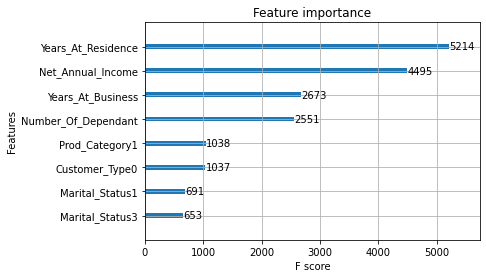

In [ ]:
plot_importance(xgb_model, max_num_features = 8)
plt.show()

Surprisingly, the Years At Residence is the most important feature, to which the net annual income has almost the same weight.

### Try oversampling method

Since we have limited fraud records, to make sure that each record appears frequently at the bagging phase, we have copied the fraud record 7 times and added back to the training set. We will see that this will help improve the precision of True positive. However, this won't improve much the F1 score.

In [ ]:
train_over_sampled = train_set.copy()
train_over_sampled[train_over_sampled["Y"] == 1]
train_over_sampled = pd.concat([train_set, train_over_sampled[train_over_sampled["Y"] == 1]], axis = 0)
train_over_sampled = pd.concat([train_over_sampled, train_over_sampled[train_over_sampled["Y"] == 1]], axis = 0)
train_over_sampled = pd.concat([train_over_sampled, train_over_sampled[train_over_sampled["Y"] == 1]], axis = 0)

In [ ]:
train_set.shape

(3766, 46)

Compared to original training set, we have added around 2000 repeated fraud record.

In [ ]:
train_over_sampled.shape

(5796, 46)

In [ ]:
train_over_sampled_label = train_over_sampled['Y'].copy()
train_over_sampled = train_over_sampled.drop("Y", axis = 1)

We rerun the Xgboost model with the same parameter as beforeï¼š

In [ ]:
dtrain_oversample = xgb.DMatrix(train_over_sampled.drop(dates, axis = 1).fillna(0), train_over_sampled_label)
xgb_model_oversample = xgb.train(plst, dtrain_oversample, num_rounds)
xgb_result_oversample = xgb_model_oversample.predict(dtest)

In [ ]:
print('num_positive :', np.sum(xgb_result_oversample))
print(confusion_matrix(list(xgb_result_oversample), test_label.tolist()))
print("recall_score : ", recall_score(list(xgb_result_oversample), test_label.tolist()))
print("f1_core : ", f1_score(list(xgb_result_oversample), test_label.tolist()))
print("precision :", precision_score(list(xgb_result_oversample), test_label.tolist()))

num_positive : 154.0
[[1386   74]
 [ 125   29]]
recall_score :  0.18831168831168832
f1_core :  0.22568093385214005
precision : 0.2815533980582524


We remark that the precision score has improved to around 30%, while recall sore decrease from 38% to 18%.

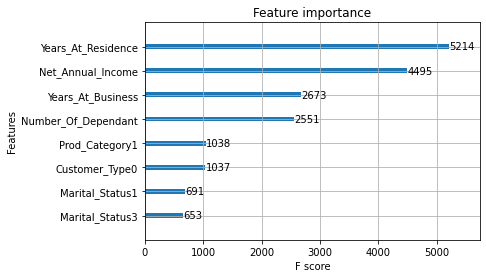

In [ ]:
plot_importance(xgb_model, max_num_features = 8)
plt.show()

## Try to visualise the data by clustering

The classical method don't work quite well on this problem, therefore we want to give some arguments to explain this phenomena. Therefore we conduct a unsupervised clustering to see what the data looks like. 
We use a TSNE package which could mapping the data from high dimension to low dimension (less than 4 is allowed for the mapped dimension). And a PCA.

From the following figure, we think that one explaination is that the fraud detection is more complicated than a binary classification, because after a dimension reduction to 3, the two class are still well entangled. And there are many different groups in both fraud and non-fraud group.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def visualize(x_cord):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    i = 0
    for x, y, z in x_cord:
        ax.scatter(y, x, z, c='b')
   
    ax.set_ylabel('X Label')
    ax.set_zlabel('Y Label')
    ax.set_xlabel('X Label')


    plt.show()

In [ ]:
df_tsne = TSNE(n_components=3).fit_transform(df_c[features_cat].fillna(0))

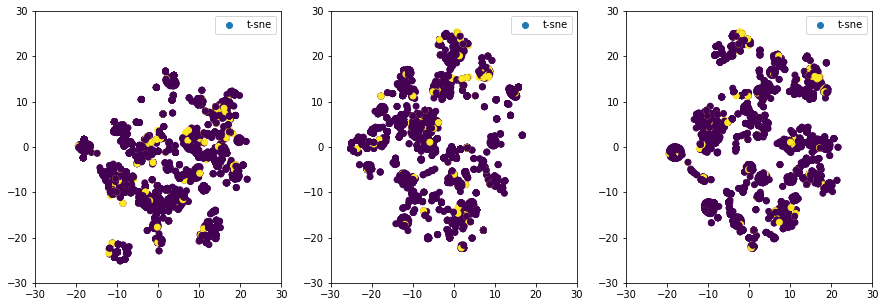

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.scatter(df_tsne[:,0], df_tsne[:,1], c=df_c.Y, label = "t-sne")
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.legend()

plt.subplot(132)
plt.scatter(df_tsne[:,1], df_tsne[:,2], c=df_c.Y, label = "t-sne")
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.legend()

plt.subplot(133)
plt.scatter(df_tsne[:,0], df_tsne[:,2], c=df_c.Y, label = "t-sne")
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.legend()

plt.show()

The yellow point represent fraud, and the purple is non-fraud. As we can see, this cannot be seperated from a clustering in 3 dimensions.

## PCA for grouping

We then look do a PCA for fraud record. This suggests that may be there are different fraud type. 

In [ ]:
#df_positive_label = df_c[df_c['Y'] == 1].Y
df_pca_positive = PCA(n_components=3).fit_transform(df_c[df_c['Y'] == 1].drop(dates+["Id_Customer", "Y"], axis = 1).fillna(0))

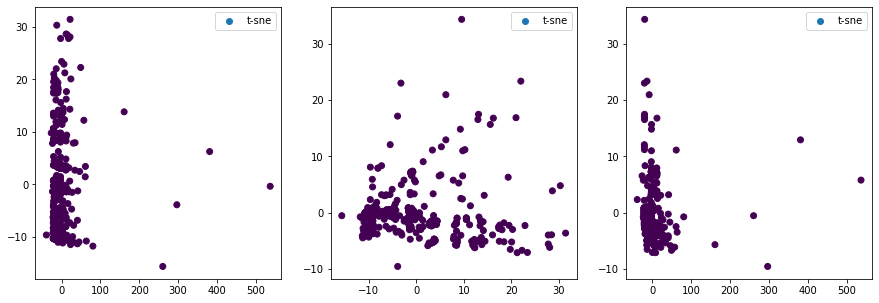

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.scatter(df_pca_positive[:,0], df_pca_positive[:,1], c= df_c[df_c['Y'] == 1].Y, label = "t-sne")
plt.legend()

plt.subplot(132)
plt.scatter(df_pca_positive[:,1], df_pca_positive[:,2], c= df_c[df_c['Y'] == 1].Y, label = "t-sne")
plt.legend()

plt.subplot(133)
plt.scatter(df_pca_positive[:,0], df_pca_positive[:,2], c= df_c[df_c['Y'] == 1].Y, label = "t-sne")
plt.legend()

plt.show()

Seems that different fraud group exist in 3 dimensions.

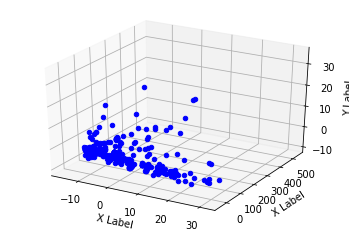

In [ ]:
visualize(df_pca_positive)

## **Neural Network Approach**

We will be using the library keras just for the sake of simplicity 

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

We return back to use the initial data in the file CreditTraining and we follow a very similar procedure to the one described above before using one hot encoder. 

In [ ]:
newdf = pd.read_csv("CreditTraining.csv")

dates = ['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date','Prod_Closed_Date']
for d in dates:
    newdf[d] = pd.to_datetime(newdf[d], format = "%d/%m/%Y", errors='ignore')

to_float = ['Net_Annual_Income']
for f in to_float:
    newdf[f] = newdf[f].str.replace(',','.').astype(float)

However, this time, before going further, we will remove some outliers and add some variables. 
We start by selecting unrealistic data such as having more than 20 dependants or at least 97 years in a business. 


In [ ]:
rows_out = set()  
rows, _ = newdf.shape

# Removing Marial Status Outliers
for i in range(rows):
    if newdf['Marital_Status'][i] == 'Separated':
        rows_out.add(i)

# Removing Number_of_dependants and truncating to 5
for i in range(rows):
    if newdf['Number_Of_Dependant'][i] == 20:
        rows_out.add(i)
    elif newdf['Number_Of_Dependant'][i] == 12:
        rows_out.add(i)
    elif newdf['Number_Of_Dependant'][i] >= 5: 
        newdf['Number_Of_Dependant'][i] = 5
# Removing data with Years_at_business >= 97, it is just not realistic
for i in range(rows):
    if newdf['Years_At_Business'][i] >= 97:
        rows_out.add(i)

rows_out = list(rows_out)

# we know that everything in rows_out must not be considered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
from sklearn.preprocessing import LabelEncoder

We will add a couple of variables (features)
Those are <br>
**time_to_decide** := Prod_Decision_Date - Customer_Open_Date <br>
**ask_age** := Customer_Open_Date - BirthDate <br>
The intuition behind these variables is to provide a relevance to the time taken by the company to communicate its decision and also to the age of a person by the time they ask for the credit. 
It is very natural to consider these variables since a longer time for **time_to_decide** could indicate that the credit will be rejected and a young age for **ask_age** can also be a factor of rejection. 

In [ ]:
# We add a column "Time_to_Decide" which is Prod_Decision_Date - Customer_Open_Date 
time_to_decide = [(newdf['Prod_Decision_Date'][i] - newdf['Customer_Open_Date'][i]).days for i in range(newdf.shape[0])]

# We add a column for the age you have when you ask for the credit
ask_age = [(newdf['Customer_Open_Date'][i] - newdf['BirthDate'][i]).days // 365 for i in range(newdf.shape[0])]

newdf = newdf.assign(Time_to_Decide = pd.Series(np.array(time_to_decide)).values)
newdf = newdf.assign(Ask_Age = pd.Series(np.array(ask_age)).values)

# Removing outliers
newdf = newdf.drop(rows_out, axis = 0)


We repeat the procedure done before for splitting the data into the train and test sets.

In [ ]:
train_set, test_set = train_test_split(newdf, test_size = 0.3, random_state = 2020)
train_label = train_set['Y'].copy()

test_label = test_set['Y'].copy()

train_set_d = train_set.copy()
print(train_set_d.info())
test_set_d = test_set.copy()
encoder_dict = {}

features_cat = ['Customer_Type','P_Client','Educational_Level','Marital_Status','Prod_Sub_Category',
                    'Source','Type_Of_Residence', 'Prod_Category']
for f in features_cat:
    encoder = LabelEncoder()
    train_set_d[f] = encoder.fit_transform(train_set_d[f])
    test_set_d[f] = encoder.fit_transform(test_set_d[f])
    encoder_dict[f] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))



print(len(train_set_d))
print(len(test_set_d))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 3056 to 867
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Customer          3756 non-null   int64         
 1   Y                    3756 non-null   int64         
 2   Customer_Type        3756 non-null   object        
 3   BirthDate            3756 non-null   datetime64[ns]
 4   Customer_Open_Date   3756 non-null   datetime64[ns]
 5   P_Client             3756 non-null   object        
 6   Educational_Level    3756 non-null   object        
 7   Marital_Status       3756 non-null   object        
 8   Number_Of_Dependant  3756 non-null   float64       
 9   Years_At_Residence   3756 non-null   int64         
 10  Net_Annual_Income    3756 non-null   float64       
 11  Years_At_Business    3754 non-null   float64       
 12  Prod_Sub_Category    3756 non-null   object        
 13  Prod_Decision_Date   3756 non-n

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
train_set_d.head()

Id_Customer  Y  Customer_Type  ... Prod_Category Time_to_Decide  Ask_Age
3056         2170  0              0  ...             2             23       47
1872         8603  0              1  ...             1              2       57
1318         6776  0              1  ...             1              5       39
99            491  1              0  ...             2           6985       34
2487         8938  0              0  ...             6            727       36

[5 rows x 21 columns]

Here, we construct our first neural network. The design is quite simple. It has 4 layers (1 input, 2 hidden and 1 output). The two hidden layers have each 16 nodes.<br>
Also, we start with a first set of features consisting in all the categorical ones plus the new two features, **time_to_decide** and **ask_age** that we defined just before. <br>
It is also important to state that we have chosen **Adam** , a optimization of Stochastic gradient descent which works in general quite well and we took **epochs** = 300, **batch_size** = 32 just because these values reduce significantly the time necessary for the training. 

In [ ]:
rem_features = features_cat.copy()
rem_features.append('Time_to_Decide')
rem_features.append('Ask_Age')

#rem_features.append('Years_At_Residence')
#rem_features.append('Net_Annual_Income')


train_label_np = train_label.to_numpy() 

model = Sequential()
model.add(Dense(16, input_dim = len(rem_features), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(train_set_d[rem_features].to_numpy(), train_label_np, epochs = 300, batch_size = 32, verbose = 0)

Now, the predictions are made based in NN. 

In [ ]:
test_set_np = test_set_d[rem_features].to_numpy()
test_label_np = test_label.to_numpy() 

predictions = model.predict(test_set_np)
print(predictions) 

[[0.07514584]
 [0.15102392]
 [0.03615004]
 ...
 [0.08930516]
 [0.06828556]
 [0.09515893]]


Finally, we choose the best threshold **best_sl** in such a way that all the predictions greater than **best_sl** are considered as 1, all the others as 0 and the number of correct predictions in the test set is maximized.

In [ ]:
test_set_np = test_set_d[rem_features].to_numpy()
test_label_np = test_label.to_numpy() 


predictions = model.predict(test_set_np)

list_of_seuils = [0.01 * i for i in range(1, 70)]
rounded = []
best_sl = -1
best_app = -1

for seuil  in list_of_seuils: 
    rounded = [1 * (x[0] > seuil) for x in predictions]
    right_prdts = np.sum([int(rounded[i] == test_label_np[i]) for i in range(len(rounded))])
    if right_prdts > best_app:
        best_app = right_prdts
        best_sl = seuil

rounded = [1* (x[0] > best_sl) for x in predictions]

print(len(rounded))
np.array([int(rounded[i] == test_label_np[i]) for i in range(len(test_label_np))])
print(np.sum(rounded))
value = np.sum([int(rounded[i] == test_label_np[i]) for i in range(len(rounded))])
print(best_sl)
print(value/len(test_label_np))

falsepos = 0
truepos = 0
falseneg = 0
for i in range(len(test_label_np)):
    if test_label_np[i] == 1 and rounded[i] == 1:
        truepos += 1
    if test_label_np[i] == 1 and rounded[i] == 0:
        falseneg += 1
    if test_label_np[i] == 0 and rounded[i] == 1:
        falsepos += 1

print("Number of ones in test set: ", truepos + falseneg, " and true positives found: ", truepos)

precision = float(truepos) / (truepos + falsepos)
recall = float(truepos) / (truepos + falseneg)

print("F1: ", 2.0*precision * recall / (precision + recall))

1611
13
0.64
0.9342023587833643
Number of ones in test set:  109  and true positives found:  8
F1:  0.13114754098360656


Thus, we end up with 15 out of 109 (~14% of correct predictions when the predictions are 1) and with a total precision of 0.934 for the complete test set. <br> <br>  

The F-score is about 0.20 (this value like the other ones change in every iteration since it depends on the training of the model using the NN). <br>
Even though, we notice that the performance of our neural network is not good enough (it is overperformed by the Xgboost approach for example), probably due to the lack of training in a resonable time (just a couple of minutes for now) and also because the design of the NN is very basic. <br>More complex networks would require more time to be trained though. 

